In [1]:
#hide
from utils import *
from fastai2.vision.widgets import *

In [2]:
! pwd

/data/home/gaedmon/fastbook/clean


In [3]:
path = 'covid19'

In [4]:
fns = get_image_files(path)
fns

(#50) [Path('convid19/normal/person612_bacteria_2478.jpeg'),Path('convid19/normal/person1_bacteria_2.jpeg'),Path('convid19/normal/NORMAL2-IM-0869-0001.jpeg'),Path('convid19/normal/person438_bacteria_1893.jpeg'),Path('convid19/normal/person1102_bacteria_3043.jpeg'),Path('convid19/normal/person1290_virus_2215.jpeg'),Path('convid19/normal/person339_bacteria_1574.jpeg'),Path('convid19/normal/person651_bacteria_2543.jpeg'),Path('convid19/normal/NORMAL2-IM-0315-0001.jpeg'),Path('convid19/normal/IM-0466-0001.jpeg')...]

## Define DataBlock

In [10]:
path = Path('covid19')
path

Path('covid19')

In [11]:
covid19 = (
    DataBlock(
        blocks= (ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed = 42),
        get_y=parent_label,
        item_tfms=Resize(128),
    )
)

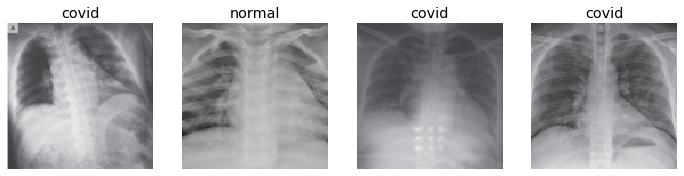

In [19]:
dls = covid19.dataloaders(path,batch_size = 10)
dls.valid.show_batch(max_n=4, rows= 1)



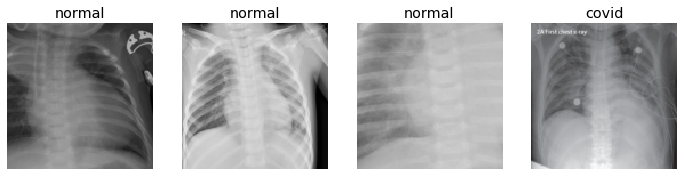

In [18]:
dls = covid19.dataloaders(path,batch_size = 10)
dls.train.show_batch(max_n=4, rows= 1)

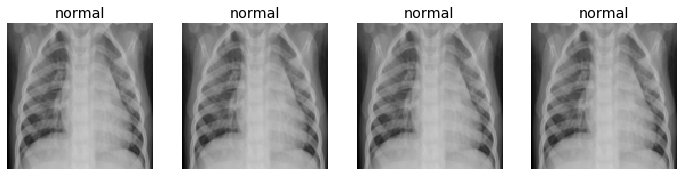

In [22]:
covid19 = covid19.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = covid19.dataloaders(path,batch_size = 1)
dls.valid.get_idxs = lambda: Inf.ones
dls.valid.show_batch(max_n=4, rows=1)

### Data augmentation

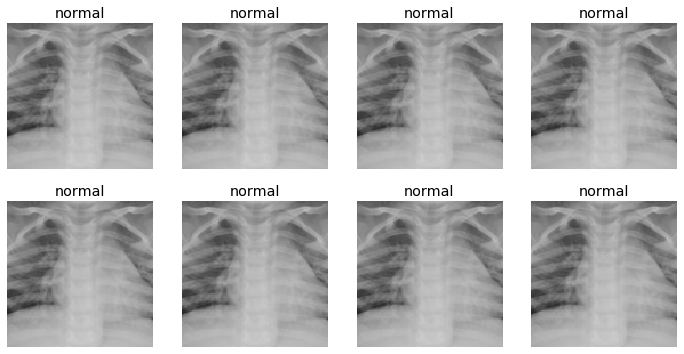

In [40]:
covid19 = covid19.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = covid19.dataloaders(path, batch_size = 25)
dls.valid.get_idxs = lambda: Inf.ones
dls.valid.show_batch(max_n=8, rows=2)

## Training your model, and using it to clean your data

In [25]:
! pwd

/data/home/gaedmon/fastbook/clean


In [45]:
path = Path('covid19')
covid19 = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items= get_image_files,
    splitter= RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [46]:
covid19 = covid19.new(
    item_tfms=RandomResizedCrop(224,min_scale=0.5),
    batch_tfms= aug_transforms()
    )
dls = covid19.dataloaders(path, batch_size=25 )

In [48]:
learner = cnn_learner(dls,resnet18,metrics=accuracy)
learner.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.339386,1.329300,0.466667,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.309856,1.248241,0.400000,00:01
1,1.216607,0.945388,0.466667,00:01
2,1.116840,0.675612,0.666667,00:01
3,0.955577,0.509777,0.733333,00:01
4,0.827502,0.440530,0.800000,00:01
5,0.742642,0.354102,0.800000,00:01
6,0.634905,0.310335,0.866667,00:01
7,0.580204,0.310052,0.866667,00:01
8,0.532924,0.309561,0.866667,00:01
9,0.476891,0.318207,0.866667,00:01


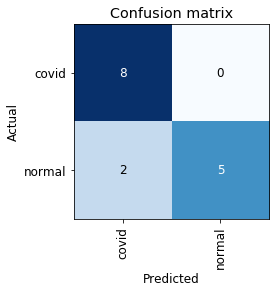

In [49]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

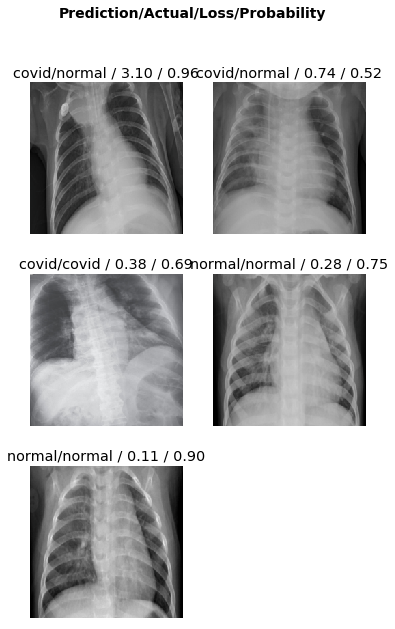

In [50]:
interp.plot_top_losses(5)